In [12]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r"C:\Users\Sahil\Downloads\Xor_Dataset.csv")

In [14]:
df.head()

,X,Y,Z
0,0,0,0
1,0,1,1
2,1,1,0
3,1,1,0
4,0,0,0


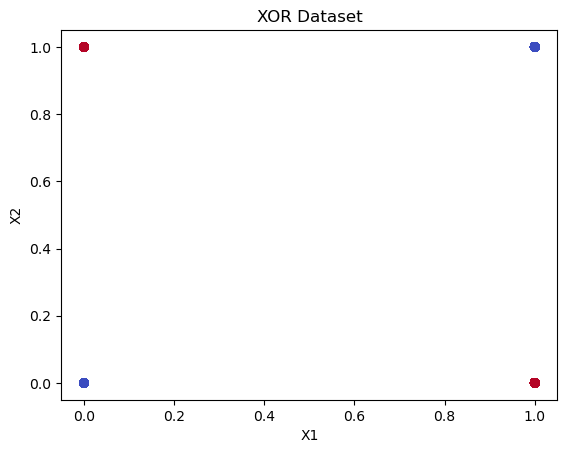

In [15]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Dataset")
plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(
    units=2,       
    activation='relu',
    input_shape=(2,)
))

model.add(Dense(
    units=1,
    activation='sigmoid'
))

C:\Users\Sahil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    X, y,
    epochs=50,
    verbose=1
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7419 - loss: 0.6034 
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.5595    
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.5303  
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.5122    
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.5010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4941    
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4899    
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4871    
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4853    
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4840    
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7459 - loss: 0.4831    
Epoch 12/50
313/3

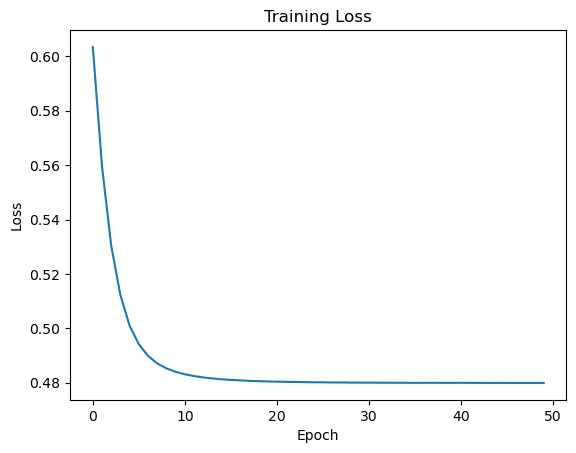

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [21]:
import numpy as np

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
preds = preds.reshape(xx.shape)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


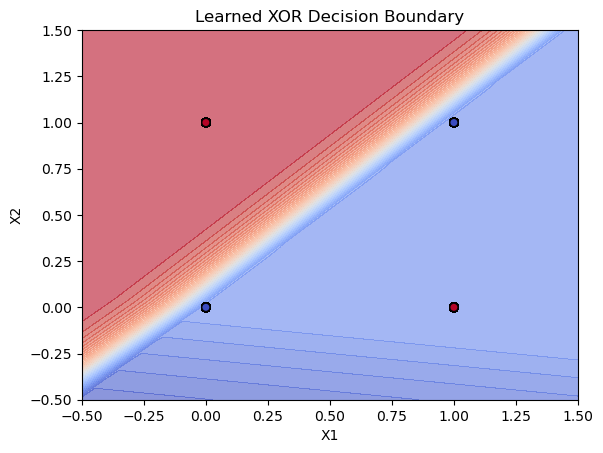

In [22]:
plt.contourf(xx, yy, preds, levels=50, cmap="coolwarm", alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Learned XOR Decision Boundary")
plt.show()